# LogisticRegression On ImageAnalysis

## Step 1- Loading Data

In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
# loading data 
dig_data = load_digits()

In [3]:
# input variable
dig_data.data.shape

(1797, 64)

In [4]:
# output variable
dig_data.target.shape

(1797,)

## Step 2- Plotting Data 

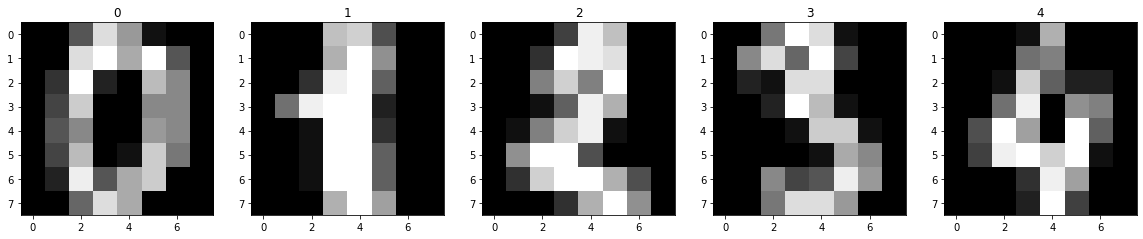

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(dig_data.data[0:5],dig_data.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(label)

## Step 3- Splitting Data

In [23]:
from sklearn.model_selection import train_test_split

x = dig_data.data
y = dig_data.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

## Step 4- Creat Model

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train,y_train)
model

C:\Users\Muhammad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 5 Prediction

In [25]:
x_test.shape

(180, 64)

In [40]:
pred = model.predict(x_test)
pred

array([6, 5, 0, 3, 8, 3, 8, 2, 4, 4, 1, 4, 0, 5, 9, 7, 1, 1, 2, 9, 2, 8,
       9, 2, 2, 9, 0, 9, 4, 0, 7, 0, 2, 0, 2, 9, 4, 0, 0, 2, 9, 2, 1, 6,
       1, 9, 7, 3, 7, 6, 3, 7, 2, 6, 0, 9, 0, 4, 9, 6, 6, 4, 5, 3, 9, 6,
       5, 1, 2, 6, 8, 8, 9, 9, 0, 3, 5, 4, 9, 4, 6, 6, 7, 3, 8, 4, 1, 3,
       3, 5, 9, 7, 6, 4, 1, 4, 2, 8, 1, 6, 0, 8, 0, 5, 8, 8, 5, 4, 9, 4,
       1, 5, 7, 9, 4, 4, 7, 5, 1, 9, 1, 5, 9, 5, 7, 3, 3, 5, 9, 1, 0, 2,
       1, 6, 5, 2, 3, 7, 7, 4, 7, 5, 2, 7, 8, 1, 8, 4, 4, 3, 8, 8, 3, 6,
       9, 2, 8, 7, 0, 2, 2, 2, 5, 5, 1, 8, 9, 6, 8, 9, 4, 2, 5, 1, 9, 3,
       2, 6, 2, 7])

## Step 6- Accuracy

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9666666666666667

In [28]:
score = model.score(x_test,y_test)
score

0.9666666666666667

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  2],
       [ 1,  0,  0,  0, 20,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 21]], dtype=int64)

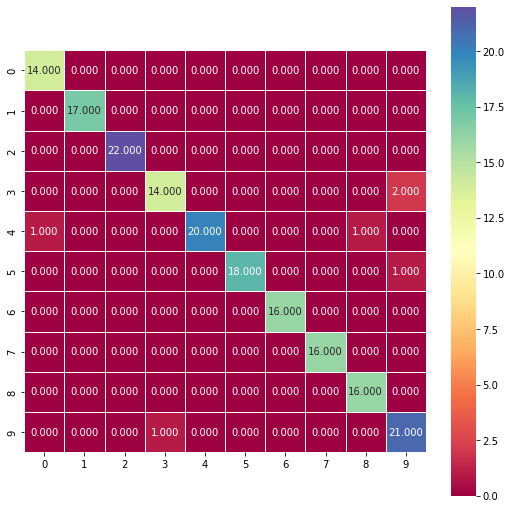

In [30]:
plt.figure(figsize=(9,9))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Spectral');

In [42]:
import numpy as np
indx = 0
missclassify = []
for label, predict in zip(y_test,pred):
    if label != predict:
        missclassify.append(indx)
        indx += 1

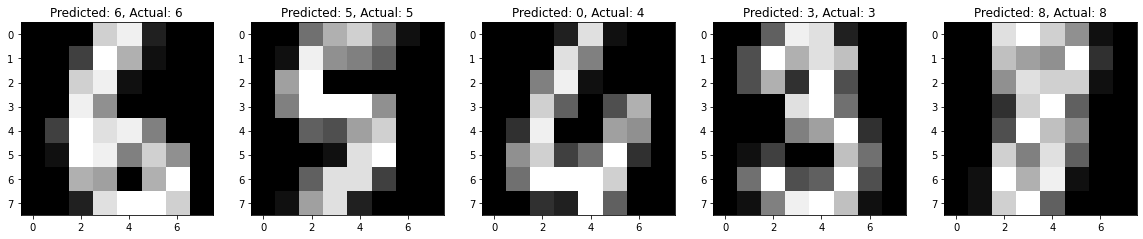

In [49]:
plt.figure(figsize=(20,4))
for plotindex,badIndex in enumerate(missclassify[0:5]):
    plt.subplot(1, 5, plotindex+1)
    plt.imshow(np.reshape(x_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(pred[badIndex],y_test[badIndex]))